# <span style="color: orange; font-weight: bold;">Maven Halloween Challenge 🎃<span>

`#mavenhalloweenchallenge`
    
[![Challenge Link](https://img.shields.io/badge/🍬%20Challenge%20Link-brightgreen)](https://mavenanalytics.io/challenges/maven-halloween-challenge/701f06a2-a19b-41e9-95d3-37a0dcc5492f)    
    
### Objective
- For the Maven Halloween Challenge, you’ll need to take a data-driven approach for becoming the most popular trick-or-treating house on the block.

- Using online votes ranking 85 types of candy, **The task is to find the 3 treats you'll give out on Halloween to guarantee that trick-or-treaters of all tastes find something they'll love and present the data to back up your decision.**

### About The Data Set
Data compiled from an experiment that set out to find the most popular Halloween candy by asking online voters to select their favorite from randomly generated matchups (for example, Twix or Snickers?).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Data Description

In [2]:
df_info = pd.read_csv('C:/Users/TEJA/Downloads/Halloween+Candy+Rankings/candy_data_dictionary.csv')
df = pd.read_csv('C:/Users/TEJA/Downloads/Halloween+Candy+Rankings/candy-data.csv')

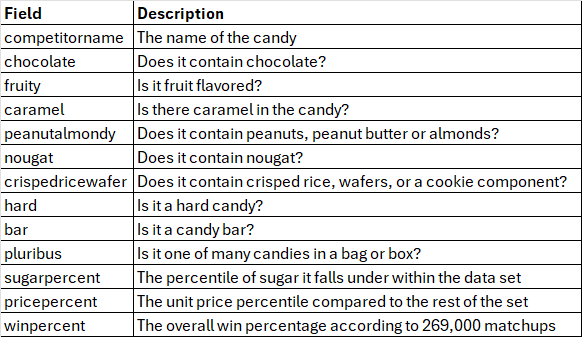

In [3]:
df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


## EDA

#### Top 5 Candies by **winpercent**

In [4]:
df_top5_win = df[['competitorname','winpercent']].sort_values(by='winpercent', ascending=False).head(5)
df_top5_win

,competitorname,winpercent
52,Reese's Peanut Butter cup,84.180290
51,Reese's Miniatures,81.866257
79,Twix,81.642914
28,Kit Kat,76.768600
64,Snickers,76.673782


#### Top 5 Candies by **suagarpercent**

In [5]:
df_top5_sug = df[['competitorname','sugarpercent']].sort_values(by='sugarpercent', ascending=False).head(5)
df_top5_sug

,competitorname,sugarpercent
54,Reese's stuffed with pieces,0.988
70,Sugar Babies,0.965
38,Milky Way Simply Caramel,0.965
61,Skittles wildberry,0.941
60,Skittles original,0.941


#### Top 5 Candies by **pricepercent**

In [6]:
df_top5_price = df[['competitorname','pricepercent']].sort_values(by='pricepercent', ascending=False).head(5)
df_top5_price

,competitorname,pricepercent
62,Nestle Smarties,0.976
44,Nik L Nip,0.976
55,Ring pop,0.965
23,Hershey's Krackel,0.918
40,Mr Good Bar,0.918


#### Correlation Analysis

In [7]:
numerical_cols = df.keys()[10:13] 
numerical_df = df[numerical_cols]

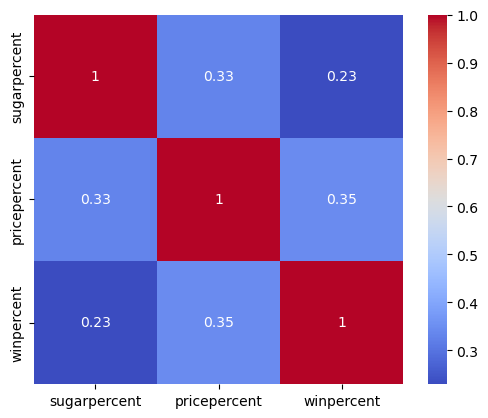

In [8]:
# Plotting correlation heatmap
dataplot = sns.heatmap(numerical_df.corr(), cmap="coolwarm", annot=True, square=True)
dataplot
# Displaying heatmap
plt.show()

In [9]:
top_20_candies = df.copy().sort_values(by='winpercent', ascending=False).head(20)
top_20_candies

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


#### **Feature Importance Analysis using SHAP (SHapley Additive exPlanations)**

In this project, SHAP (SHapley Additive exPlanations) values were used to interpret the predictions of our machine learning model, which estimates the **winpercent** of various candies based on their features (such as **chocolate**, **fruity**, **sugarpercent**, and others). SHAP values help break down the influence of each feature on the predicted winpercent for every candy.

- **Feature Importance** : SHAP values quantify how much each feature (e.g., chocolate or sugarpercent) contributes to increasing or decreasing a candy’s winpercent. For instance, features like **chocolate** and **pricepercent** have strong positive or negative impacts on the model’s predictions, indicating how these factors influence the candy's success.

- **Individual Candy Impact** : For each candy, the SHAP values reveal why the model predicted a certain winpercent. This insight allows us to explain why certain candies, like chocolate-heavy ones, tend to perform better, or why certain candies might appeal more to price-sensitive consumers.

- **Top 3 Selection** : SHAP values helped guide the decision-making process for selecting the **Top 3 candies** by providing transparency in how each feature affected the ranking. For example, candies with high positive SHAP values for **sugarpercent** are identified as more suitable for sweet-tooth consumers, while candies with high SHAP values for **pricepercent** appeal more to price-sensitive buyers.

By using SHAP values, the model's predictions become more explainable, allowing us to make informed decisions on which candies perform best based on their attributes, contributing to a fair and transparent ranking process.

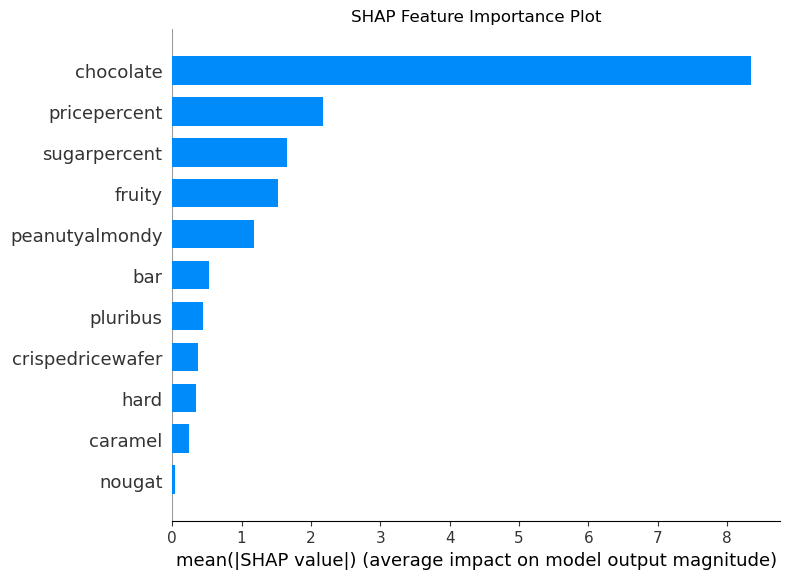

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=['competitorname', 'winpercent'])
y = df['winpercent']

# Scale continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
plt.figure(figsize=(10, 6))
plt.title('SHAP Feature Importance Plot')
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar')

**Observations from SHAP Feature Importance Plot**

- **Chocolate**: The presence of chocolate has the biggest impact on the candy’s popularity (or `winpercent`).

- **Price**: The candy’s price also plays an important role in predicting its success.

- **Sugar Content**: How much sugar the candy has affects the prediction as well.

- **Fruity**: Whether the candy is fruity moderately influences its success.

- **Peanuts/Almonds**: If the candy contains peanuts or almonds, it has a smaller impact compared to chocolate but still matters.

- **Other Features**: Attributes like being a bar, having crisped rice, caramel, or nougat have the least impact on the prediction. 

In short, chocolate, pricepercent, and sugarpercent are the most important factors, while other features play a minor role.

#### **Product Scoring via Composite Score**

A `Composite Score` was calculated for each candy to rank them based on multiple features and their relative importance. The Composite Score provided a unified metric that combines the influence of different attributes (e.g., chocolate, fruity, pricepercent, sugarpercent, etc.) to determine the overall appeal or success of each candy.

In [12]:
# Extract SHAP values for each feature and sum them across samples
# shap_values.values has the shape (n_samples, n_features)
shap_values_array = shap_values.values

# Calculate the mean absolute SHAP value for each feature (importance)
shap_importance = np.abs(shap_values_array).mean(axis=0)

# Create a DataFrame to store feature names and their corresponding SHAP importance
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': shap_importance
})

# Sort features by SHAP importance
feature_importance_df = feature_importance_df.sort_values(by='shap_importance', ascending=False)

# Display the top features based on SHAP importance
feature_importance_df

,feature,shap_importance
0,chocolate,8.345259
10,pricepercent,2.167187
9,sugarpercent,1.657882
1,fruity,1.520226
3,peanutyalmondy,1.176094
7,bar,0.526377
8,pluribus,0.437615
5,crispedricewafer,0.365876
6,hard,0.340317
2,caramel,0.247908


Normalizing the SHAP values

In [13]:
sum_shap = feature_importance_df['shap_importance'].sum()

# Normalizing SHAP Importance Values to calculate Feature Weights
feature_importance_df['feature_weight'] = (feature_importance_df['shap_importance']/sum_shap)

feature_importance_df

,feature,shap_importance,feature_weight
0,chocolate,8.345259,0.495811
10,pricepercent,2.167187,0.128758
9,sugarpercent,1.657882,0.098499
1,fruity,1.520226,0.090320
3,peanutyalmondy,1.176094,0.069874
7,bar,0.526377,0.031273
8,pluribus,0.437615,0.026000
5,crispedricewafer,0.365876,0.021738
6,hard,0.340317,0.020219
2,caramel,0.247908,0.014729


##### Calculating **Composite Score** for each Candy

For each candy, the **feature values** (such as whether it contains chocolate or its sugar percentage) were multiplied by their corresponding **feature weights**. This step ensured that more influential features had a proportionally larger effect on the overall score.

<strong><p style="color: purple;">Composite Score = Σ (Feature Value × Feature Weight)<strong></p>



In [14]:
# Create a dictionary of feature weights for easier lookup
feature_weights = dict(zip(feature_importance_df['feature'], feature_importance_df['feature_weight']))

# Create a function to calculate composite score for each row
def calculate_composite_score(row, feature_weights):
    composite_score = 0
    for feature in feature_weights.keys():
        composite_score += row[feature] * feature_weights[feature]
    return composite_score

# Apply the function to each row and create a new column 'Composite_Score'
df['Composite_Score'] = df.apply(calculate_composite_score, axis=1, feature_weights=feature_weights)

In [15]:
# Sorting by Composite Score
df[['competitorname', 'Composite_Score']].sort_values(by='Composite_Score',
               ascending=False).head(10)

,competitorname,Composite_Score
65,Snickers Crisper,0.776740
6,Baby Ruth,0.772718
32,Peanut butter M&M's,0.756768
42,Nestle Butterfinger,0.755209
64,Snickers,0.752069
38,Milky Way Simply Caramel,0.747596
54,Reese's stuffed with pieces,0.746823
0,100 Grand,0.746383
40,Mr Good Bar,0.745988
5,Almond Joy,0.741518


##### Combining Winpercent and Composite Score through Weighted Average for a **Final_Score** to decide the winners

- The win-percent is an observed or actual performance metric for each candy. It's an essential component because it directly shows how popular or well-liked the candy is. However, instead of relying on this alone, we combine it with the composite score to account for both the observed popularity and the theoretical score based on features.

- To combine both scores, we assign weights to the composite score and the win-percent based on their perceived importance. For example, if you want to weigh the composite score and win-percent equally, you might assign each a weight of 0.5. However, if you believe one should have more influence, you adjust the weights accordingly. 

- For instance, In this case a weight of 0.6 for the win-percent and 0.4 for Composite Score is considered, `winpercent` is given more importance compared to `Composite_Score`;

    - 60% weight to `winpercent`

    - 40% weight to `Composite_Score`

In [16]:
df_final = df.copy()
df_final.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Composite_Score
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.746383
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0.655152
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.016019
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.066879
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0.245355


**Final Score Calculation**:

- The final score for each candy is then calculated as :

   <strong><p style="color: green;">Final Score = (Normalized Winpercent × Winpercent Weight) + (Normalized Composite Score × Composite Score Weight)</p><strong>

- The products are ranked based on the Final Score, with the top-ranked products having the highest final score. The ranking is done in descending order, meaning the product with the highest final score gets the top rank (Rank 1), and so on.

In [17]:
# Normalize the scores between 0 and 1
df_final['Normalized_Winpercent'] = (df_final['winpercent'] - df_final['winpercent'].min()) / (df_final['winpercent'].max() - df_final['winpercent'].min())
df_final['Normalized_Composite_Score'] = (df_final['Composite_Score'] - df_final['Composite_Score'].min()) / (df_final['Composite_Score'].max() - df_final['Composite_Score'].min())

# Define the weights
winpercent_weight = 0.6   # Change Accordingly
composite_score_weight = 0.4    # Change Accordingly 

# Calculate the final weighted score
df_final['Final_Score'] = (df_final['Normalized_Winpercent'] * winpercent_weight) + (df_final['Normalized_Composite_Score'] * composite_score_weight)

# Rank the products based on the final score
df_final['Final_Rank'] = df_final['Final_Score'].rank(ascending=False)

# Get the Top 3 products
top_3_products = df_final.nlargest(5, 'Final_Score')[['competitorname', 'Final_Score', 'Final_Rank']]

top_3_products

,competitorname,Final_Score,Final_Rank
52,Reese's Peanut Butter cup,0.970389,1.0
79,Twix,0.952858,2.0
64,Snickers,0.914072,3.0
51,Reese's Miniatures,0.887184,4.0
54,Reese's stuffed with pieces,0.874519,5.0


<h5 style="color: orange;">Top 3 Overall Winners</h5>

We can observe that form the **Final_Score** (which is a weighted sum of the features `winpercent` & `Composite_Score`), The winners are 

1. **Reese's Peanut Butter cup**
   
   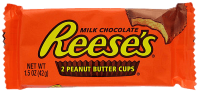

2. **Twix**
   
   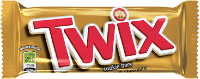

3. **Snickers**
   
   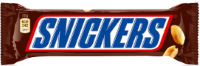


and are ranked the **Top 3 candies** for Trick-or-Treat !!! 🍬


---

#### Top 3 candies for those with a Sweet Tooth 

In [34]:
from sklearn.preprocessing import MinMaxScaler

df_sugar = df.copy()

# Create a scaler to normalize the features
scaler = MinMaxScaler()

# Normalize the Composite Score and sugarpercent
df_sugar['Normalized_Composite_Score'] = scaler.fit_transform(df_sugar[['Composite_Score']])
df_sugar['Normalized_Sugarpercent'] = scaler.fit_transform(df_sugar[['sugarpercent']])

# Define the weights (adjust based on preference)
composite_weight = 0.4  # Less emphasis on composite score
sugar_weight = 0.6      # More emphasis on sugar content for sweet tooth

# Calculate the final score (weighted combination)
df_sugar['Sweet_Tooth_Score'] = (df_sugar['Normalized_Composite_Score'] * composite_weight) + (df_sugar['Normalized_Sugarpercent'] * sugar_weight)

# Rank candies based on the Sweet Tooth Score
top_3_sweet_candies = df_sugar.nlargest(3, 'Sweet_Tooth_Score')[['competitorname', 'Sweet_Tooth_Score']]

# Print the top 3 candies for people with a sweet tooth
print("Top 3 candies for people with a sweet tooth:")
top_3_sweet_candies

Top 3 candies for people with a sweet tooth:


,competitorname,Sweet_Tooth_Score
54,Reese's stuffed with pieces,0.984270
38,Milky Way Simply Caramel,0.970551
84,Whoppers,0.908721


#### Top 3 Affordable Candies Without Compromising Quality

In [33]:
df_price_sensitive = df.copy()

# Normalize the Composite Score and pricepercent
df_price_sensitive['Normalized_Composite_Score'] = scaler.fit_transform(df_price_sensitive[['Composite_Score']])
df_price_sensitive['Normalized_Pricepercent'] = scaler.fit_transform(df_price_sensitive[['pricepercent']])

# Invert the pricepercent (lower pricepercent should result in a higher score)
df_price_sensitive['Inverted_Pricepercent'] = 1 - df_price_sensitive['Normalized_Pricepercent']

# Define the weights (adjust based on preference)
composite_weight = 0.3  # Less emphasis on composite score
price_weight = 0.7      # More emphasis on price for price-sensitive people

# Calculate the final score (weighted combination)
df_price_sensitive['Price_Sensitive_Score'] = (df_price_sensitive['Normalized_Composite_Score'] * composite_weight) + (df_price_sensitive['Inverted_Pricepercent'] * price_weight)

# Rank candies based on the Price Sensitive Score
top_3_price_sensitive_candies = df_price_sensitive.nlargest(3, 'Price_Sensitive_Score')[['competitorname', 'Price_Sensitive_Score']]

# Print the top 3 candies for price-sensitive people
print("Top 3 candies for price-sensitive people (This combined score takes into account both affordability and overall quality):")
top_3_price_sensitive_candies

Top 3 candies for price-sensitive people (This combined score takes into account both affordability and overall quality):


,competitorname,Price_Sensitive_Score
76,Tootsie Roll Midgies,0.906783
59,Sixlets,0.861347
22,Hershey's Kisses,0.849639


#### Top 3 Fruity Candies

In [35]:
# Filter candies with fruity taste
fruity_candies = df[df['fruity'] == 1]

# Sort by Composite Score in descending order
top_3_fruity_candies = fruity_candies.nlargest(3, 'Composite_Score')[['competitorname', 'Composite_Score']]

# Print the top 3 fruity candies
print("Top 3 fruity candies based on Composite Score:")
top_3_fruity_candies

Top 3 fruity candies based on Composite Score:


,competitorname,Composite_Score
74,Tootsie Pop,0.707690
55,Ring pop,0.306891
49,Pop Rocks,0.303802


## Conclusions

1. **Objective**: The primary challenge was to identify the **Top 3 candies** you'll give out on Halloween to guarantee that trick-or-treaters of all tastes find something they'll love.

2. **Feature Selection**: The dataset included both binary (e.g., chocolate, fruity, hard) and continuous features (e.g., sugar percent, price percent), requiring careful consideration of how each attribute impacts candy popularity.

3. **SHAP Analysis**: We applied **SHAP (SHapley Additive exPlanations)** values to identify the **impact of each feature** on the target variable, *winpercent*. This helped understand which features (e.g., chocolate, sugar percent) had the most influence on a candy's overall popularity.

4. **Composite Score Creation**: Using the SHAP values, a **Composite Score** was calculated for each candy by weighting each feature based on its importance. This score provided a theoretical ranking of candies based on their attributes.

5. **Combining Composite Score with Win Percent**: The final candy ranking was created by combining the **Composite Score** with the actual *win-percent* (popularity score) using a **weighted approach**. This balanced theoretical predictions with real-world data.

6. **Normalization and Weighting**: To ensure a fair comparison, both the composite scores and win-percent values were **normalized between 0 and 1**. Different weightings (e.g., 60% for win-percent, 40% for composite score) were applied based on the emphasis placed on each factor.

7. **Sweet-Tooth and Price-Sensitive Insights**: 
   - **Top 3 Final Winners**: Reese's Peanutbutter Cups, Twix and Snickers
   
   - **Top 3 Sweet-Tooth Candies**: Reese's stuffed with pieces, Milky Way Simply Caramel, and Whoppers.
   
   - **Top 3 Price-Sensitive Candies**: Tootsie Roll Midgies, Sixlets, and Hershey’s Kisses.

   - **Top 3 Fruity Candies**:Tootsie Pop	, Ring pop, Pop Rocks 

---